[1.000e+00 6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00
 6.520e+01 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
[1.      0.00632]


C:\Users\seslab\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\seslab\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\seslab\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:66: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and 

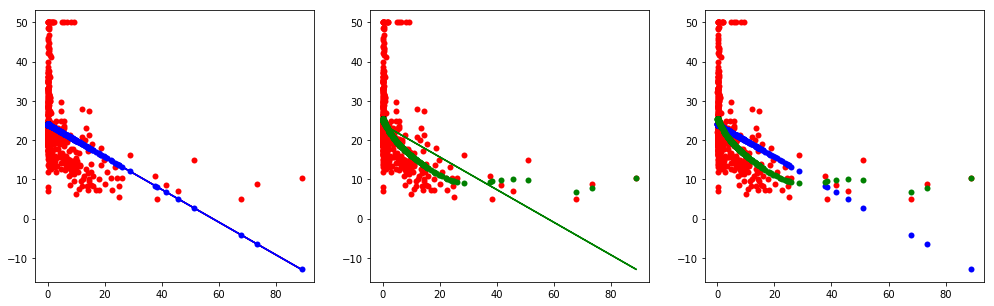

In [1]:
'''
@ copyright: AAI lab (http://aailab.kaist.ac.kr/xe2/page_GBex27)
@ author: Moon Il-chul; icmoon@kaist.ac.kr
@ annotated by Kim Hyemi; khm0308@kaist.ac.kr
'''

#아래의 예제는 선형회귀(Linear Regression)를 통해 주어진 데이터를 선형함수(Linear Function)로서 근사하는 과정입니다.#아래의 예제를 통하여 Probably Approximately Correct한 목표함수를 학습하는 기계학습에서, 목표함수를 선형함수(Linear Function)로 근사하는 방법을 익힐 수 있습니다.

import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline

#Dataset: UCI신용평가 데이터(Credit Approval Dataset)- 13개의 Attribute(Independent Variable)와 1개의 Dependent Value가 있는 형태입니다.
#X: Feature variable
#Y: Depedent variable
X = []
Y = []

f = open('X.csv', 'r')
csvReader = csv.reader(f)

for row in csvReader:
    X.append(row)
  
f = open('Y.csv', 'r')
csvReader = csv.reader(f)

for row in csvReader:
    Y.append(row)
   
f.close()

X = np.asarray(X, dtype = 'float64')
Y = np.asarray(Y, dtype = 'float64')

#아래의 예제는 x의 1차항만 고려하는 선형회귀(Linear Regression) 모형입니다.

#xTemp: 13개의 Attribute 중 첫 번째 Attribute만 Feature varaible로 활용함
    #xTemp[i]  =[1, x(i)]
#theta(θ): 오차의 제곱을 최소화하는 매개변수 값
    #오차: |Y-Y_est|
    #θ = (XTX)−1XTY
#Y_est(= xTemp * θ): 위에서 구해진 Tehta로 도출된 예측치

xTemp = X[:, 0:2]

theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xTemp), xTemp)), np.transpose(xTemp)), Y)

Y_est = np.dot(xTemp, theta)

#m0, c0 = argmin |Y - (m0 * xYemp + c0)|^2
#m1, c1 = argmin |Y_est - (m1 * xYemp + c1)|^2
m0, c0 = np.linalg.lstsq(xTemp, Y)[0]
m1, c1 = np.linalg.lstsq(xTemp, Y_est)[0]

#아래의 예제는 x의 8차항으로 이루어진 다항회귀(Polynomial Regression) 모형입니다.

#newX: newX[i] = [1, x(i), x(i)^2, x(i)^3, x(i)^4, x(i)^5, x(i)^6, x(i)^7, x(i)^8]
#newTheta: 오차의 제곱을 최소화하는 매개변수 값
    #오차: |Y-newY_est|
#newY_est(= newX * newθ): 위에서 구해진 newTehta로 도출된 예측치

newX = np.zeros((X.shape[0], 9))

newX[:, 0:2] = X[:, 0:2]

#X의 제곱항을 만들기 위하여 아래의 For-Loop를 활용함
for i in range(2, 9):
    newX[:, i] = newX[:, 1] * newX[:, i-1]

newTheta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(newX), newX)), np.transpose(newX)), Y)

newY_est = np.dot(newX, newTheta)

#m2, c2 = argmin |Y_est - (m2 * xYemp + c2)|^2
m2, c2 = np.linalg.lstsq(xTemp, newY_est)[0]

#결과값을 그래프로 나타냄
#x축은 사용한 Feature Variable의 값이고, y축은 Dependent Variable의 값
plt.figure(1, figsize = (17, 5))

#x의 1차항으로 이루어진 다항회귀 모형
#빨간색 점은 실제 데이터의 분포이고, 파랑색점은 실제 데이터의 예측치, 파란색 선은 선형회귀 방정식의 그래프
ax1 = plt.subplot(1, 3, 1)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], m0+c0*X[:, 1], 'r-')
plt.plot(X[:, 1], Y_est, 'bo', markeredgecolor = 'none')
plt.plot(X[:, 1], m1+c1*X[:, 1], 'b-')

#x의 8차항으로 이루어진 선형회귀 모형
#빨간색 점은 실제 데이터의 분포이고, 초록색점은 실제 데이터의 예측치, 초록색 선은 다항회귀 방정식의 그래프
ax2 = plt.subplot(1, 3, 2, sharey = ax1)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], newY_est, 'go', markeredgecolor = 'none')
plt.plot(X[:, 1], m2 + c2*X[:, 1], 'g-')

#선형회귀 모형과 다항회귀 모형의 비교
#빨간색 점은 실제 데이터의 분포이고,파랑색 점은 선형회귀 모형의 예측치, 초록색 점은 다항회귀 모형의 예측치
ax3 = plt.subplot(1, 3, 3, sharey = ax2)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], Y_est, 'bo', markeredgecolor = 'none')
plt.plot(X[:, 1], newY_est, 'go', markeredgecolor = 'none')

plt.show()

In [11]:
%matplotlib inline

In [12]:
X = []
Y = []

f = open('X.csv', 'r')
csvReader = csv.reader(f)

for row in csvReader:
    X.append(row)
    
f = open('Y.csv', 'r')
csvReader = csv.reader(f)

for row in csvReader:
    Y.append(row)
    
f.close()

X = np.asarray(X, dtype = 'float64')
Y = np.asarray(Y, dtype = 'float64')

In [4]:
xTemp = X[:, 0:2]

theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xTemp), xTemp)), np.transpose(xTemp)), Y)

Y_est = np.dot(xTemp, theta)

In [5]:
xTemp = X[:, 0:2]

theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xTemp), xTemp)), np.transpose(xTemp)), Y)

Y_est = np.dot(xTemp, theta)

m0, c0 = np.linalg.lstsq(xTemp, Y)[0]
m1, c1 = np.linalg.lstsq(xTemp, Y_est)[0]

In [6]:
newX = np.zeros((X.shape[0], 9))
newX[:, 0:2] = X[:, 0:2]
for i in range(2, 9):
    newX[:, i] = newX[:, 1] * newX[:, i-1]

newTheta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(newX), newX)), np.transpose(newX)), Y)

newY_est = np.dot(newX, newTheta)

m2, c2 = np.linalg.lstsq(xTemp, newY_est)[0]

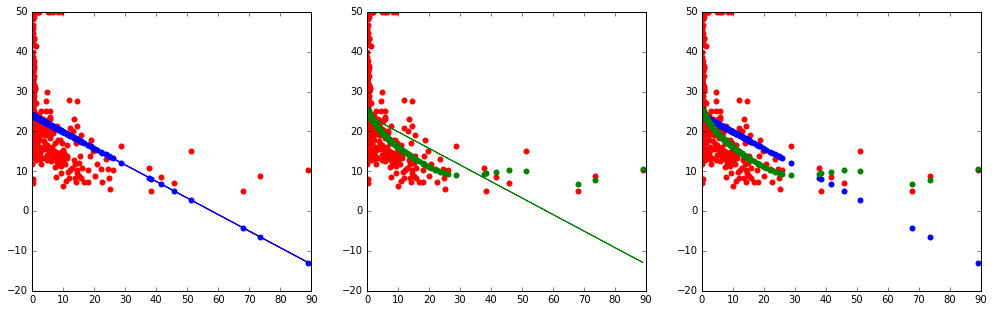

In [7]:
plt.figure(1, figsize = (17, 5))

ax1 = plt.subplot(1, 3, 1)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], m0+c0*X[:, 1], 'r-')
plt.plot(X[:, 1], Y_est, 'bo', markeredgecolor = 'none')
plt.plot(X[:, 1], m1+c1*X[:, 1], 'b-')

ax2 = plt.subplot(1, 3, 2, sharey = ax1)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], newY_est, 'go', markeredgecolor = 'none')
plt.plot(X[:, 1], m2 + c1*X[:, 1], 'g-')

ax3 = plt.subplot(1, 3, 3, sharey = ax2)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], Y_est, 'bo', markeredgecolor = 'none')
plt.plot(X[:, 1], newY_est, 'go', markeredgecolor = 'none')

plt.show()